<a href="https://colab.research.google.com/github/Rahul-045044/045044_Python_Project/blob/main/045044_data_scraping_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/Ease_of_doing_business_index"

# Read the tables from the webpage
tables = pd.read_html(url, header=0)

# Find the table that contains the desired data
desired_table = None

for table in tables:
    if "2020" in table.columns:
        desired_table = table
        break

# Check if the desired table was found
if desired_table is not None:
    # Rename the columns for consistency
    desired_table.columns = [str(col) for col in desired_table.columns]

    # Remove unnecessary columns
    desired_table = desired_table[["Jurisdiction", "Classification"] + [str(year) for year in range(2006, 2021)]]

    # Reset the index
    desired_table.reset_index(drop=True, inplace=True)

    # Print the resulting DataFrame
    print(desired_table)
else:
    print("Desired table not found on the page.")


    Jurisdiction Classification  2006  2007  2008  2009  2010  2011  2012  \
0            NaN            NaN  [91]  [90]  [89]  [88]  [87]  [86]  [85]   
1    New Zealand      Very Easy     1     2     2     2     2     3     3   
2      Singapore      Very Easy     2     1     1     1     1     1     1   
3      Hong Kong      Very Easy     7     5     4     4     3     2     2   
4        Denmark      Very Easy     8     7     5     5     6     6     5   
..           ...            ...   ...   ...   ...   ...   ...   ...   ...   
186        Libya  Below Average     —     —     —     —     —     —     —   
187        Yemen  Below Average    90    98   113    98    99   105    99   
188    Venezuela  Below Average   120   164   172   174   177   172   177   
189      Eritrea  Below Average   137   170   171   173   175   180   180   
190      Somalia  Below Average     —     —     —     —     —     —     —   

     2013  2014  2015  2016  2017  2018  2019  2020  
0    [84]  [83]  [82]

In [ ]:
import pandas as pd

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/Ease_of_doing_business_index"

# Read the tables from the webpage
tables = pd.read_html(url, header=0)

# Find the table that contains the desired data
desired_table = None

for table in tables:
    if "2020" in table.columns:
        desired_table = table
        break

# Check if the desired table was found
if desired_table is not None:
    # Fill missing values in the "Jurisdiction" column with an empty string
    desired_table["Jurisdiction"] = desired_table["Jurisdiction"].fillna("")

    # Filter out rows that contain reference links
    desired_table = desired_table[~desired_table["Jurisdiction"].str.contains(r'\[\d+\]')]

    # Reset the index
    desired_table.reset_index(drop=True, inplace=True)

    # Print the resulting DataFrame
    print(desired_table)
else:
    print("Desired table not found on the page.")


    Jurisdiction Classification  2020  2019  2018  2017  2016  2015  2014  \
0                           NaN  [77]  [78]  [79]  [80]  [81]  [82]  [83]   
1    New Zealand      Very Easy     1     1     1     1     2     2     3   
2      Singapore      Very Easy     2     2     2     2     1     1     1   
3      Hong Kong      Very Easy     3     4     5     4     5     3     2   
4        Denmark      Very Easy     4     3     3     3     3     4     5   
..           ...            ...   ...   ...   ...   ...   ...   ...   ...   
186        Libya  Below Average   186   186   185   188   188   188   187   
187        Yemen  Below Average   187   187   186   179   170   137   133   
188    Venezuela  Below Average   188   188   188   187   186   182   181   
189      Eritrea  Below Average   189   189   189   189   189   189   184   
190      Somalia  Below Average   190   190   190   190     —     —     —   

     2013  2012  2011  2010  2009  2008  2007  2006  
0    [84]  [85]  [86]

In [ ]:
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/Ease_of_doing_business_index"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the webpage content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table containing the data (it has class "wikitable")
    tables = soup.find_all('table', {'class': 'wikitable'})

    # We are interested in the first table (index 0)
    table = tables[0]

    # Initialize lists to store the table data
    data = []

    # Loop through the rows in the table, skipping the header row
    for row in table.find_all('tr')[1:]:
        columns = row.find_all(['th', 'td'])

        # Check if there are enough columns
        if len(columns) >= 17:
            jurisdiction = columns[0].text.strip()
            classification = columns[1].text.strip()
            years = [cell.text.strip() for cell in columns[2:]]

            # Append data as a list of strings
            data.append([jurisdiction, classification] + years)

    # Define the table headers
    headers = ["Jurisdiction", "Classification"] + [str(year) for year in range(2006, 2021)]

    # Display the data in a tabular format
    table = tabulate(data, headers, tablefmt="fancy_grid")
    print(table)

else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


╒══════════════════════════════════╤══════════════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╕
│ Jurisdiction                     │ Classification   │ 2006   │ 2007   │ 2008   │ 2009   │ 2010   │ 2011   │ 2012   │ 2013   │ 2014   │ 2015   │ 2016   │ 2017   │ 2018   │ 2019   │ 2020   │
╞══════════════════════════════════╪══════════════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╡
│                                  │                  │ [77]   │ [78]   │ [79]   │ [80]   │ [81]   │ [82]   │ [83]   │ [84]   │ [85]   │ [86]   │ [87]   │ [88]   │ [89]   │ [90]   │ [91]   │
├──────────────────────────────────┼──────────────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│ New Zealand                      │ Very Eas

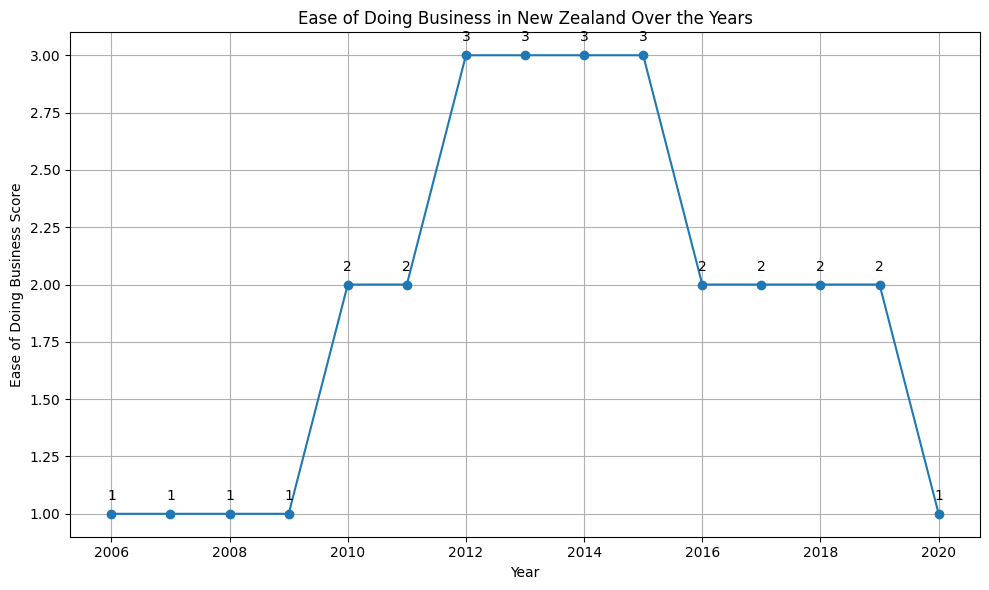

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'Year': ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
    'New Zealand': [1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Convert the 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['New Zealand'], marker='o', linestyle='-')
plt.title('Ease of Doing Business in New Zealand Over the Years')
plt.xlabel('Year')
plt.ylabel('Ease of Doing Business Score')
plt.grid(True)

# Adding labels to data points for clarity
for i, score in enumerate(df['New Zealand']):
    plt.annotate(score, (df['Year'].iloc[i], score), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the line chart
plt.tight_layout()
plt.show()


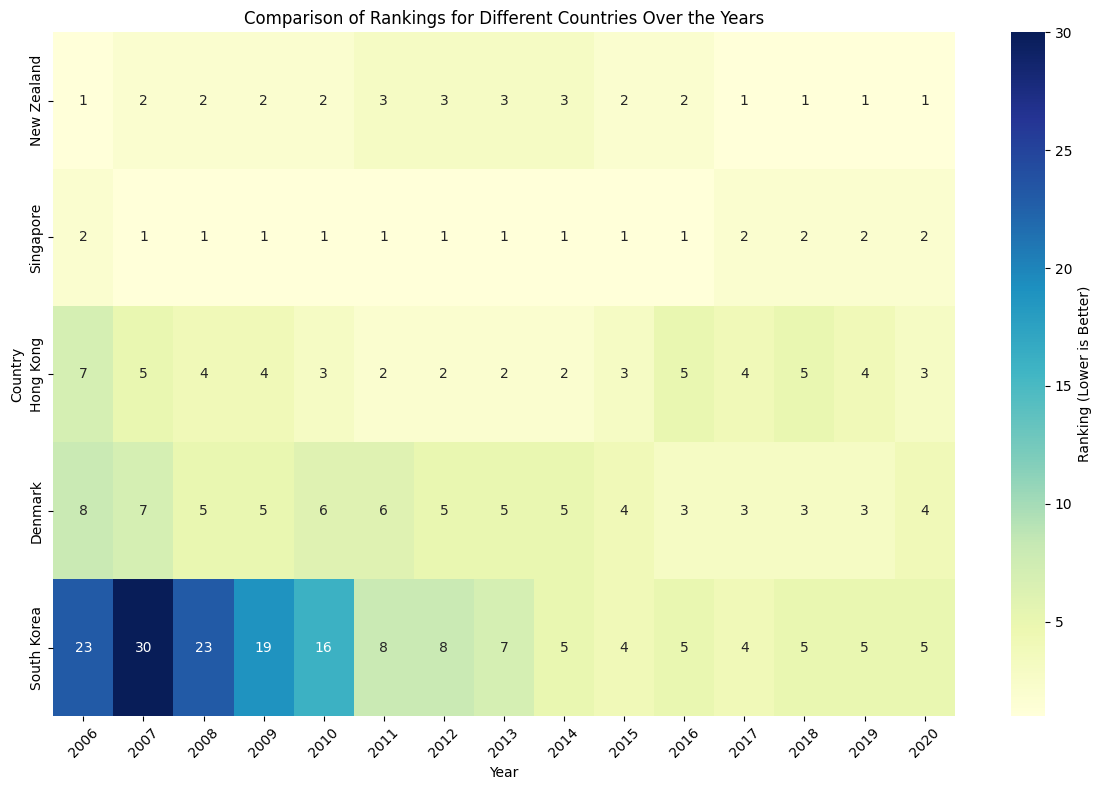

In [ ]:
# heat map
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace this with your actual data
data = {
    'Jurisdiction': ['New Zealand', 'Singapore', 'Hong Kong', 'Denmark', 'South Korea'],
    'Classification': ['Very Easy', 'Very Easy', 'Very Easy', 'Very Easy', 'Very Easy'],
    '2006': [1, 2, 7, 8, 23],
    '2007': [2, 1, 5, 7, 30],
    '2008': [2, 1, 4, 5, 23],
    '2009': [2, 1, 4, 5, 19],
    '2010': [2, 1, 3, 6, 16],
    '2011': [3, 1, 2, 6, 8],
    '2012': [3, 1, 2, 5, 8],
    '2013': [3, 1, 2, 5, 7],
    '2014': [3, 1, 2, 5, 5],
    '2015': [2, 1, 3, 4, 4],
    '2016': [2, 1, 5, 3, 5],
    '2017': [1, 2, 4, 3, 4],
    '2018': [1, 2, 5, 3, 5],
    '2019': [1, 2, 4, 3, 5],
    '2020': [1, 2, 3, 4, 5]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the 'Jurisdiction' column as the index
df.set_index('Jurisdiction', inplace=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.loc[:, '2006':'2020'], annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Ranking (Lower is Better)'})
plt.title('Comparison of Rankings for Different Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


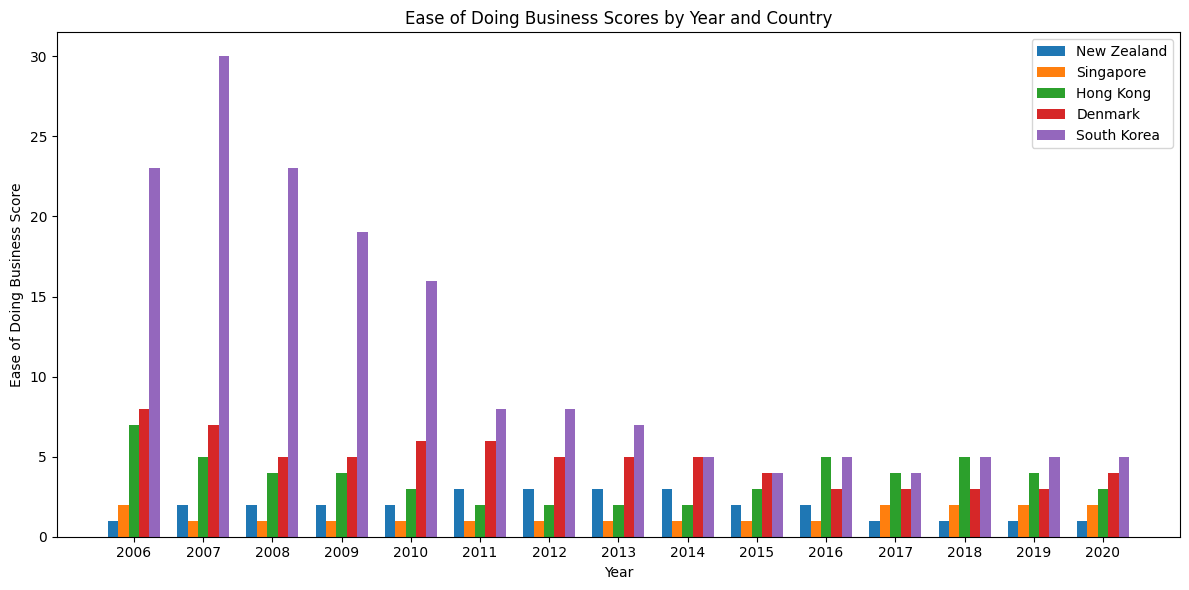

In [5]:
import numpy as np
import matplotlib.pyplot as plt

years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
countries = ['New Zealand', 'Singapore', 'Hong Kong', 'Denmark', 'South Korea']
scores = {
    'New Zealand': [1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 1, 1, 1, 1],
    'Singapore': [ 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2],
    'Hong Kong': [7, 5, 4, 4, 3, 2, 2, 2, 2, 3, 5, 4, 5, 4, 3 ],
    'Denmark': [8, 7, 5, 5, 6, 6, 5, 5, 5, 4, 3, 3, 3, 3, 4],
    'South Korea': [23, 30, 23, 19, 16, 8, 8, 7, 5, 4, 5, 4, 5, 5, 5],
}

# Create an array of positions for bars
x = np.arange(len(years))

# Define the width of the bars
bar_width = 0.15

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each country
for i, country in enumerate(countries):
    ax.bar(x + i * bar_width, scores[country], bar_width, label=country)

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Ease of Doing Business Score')
ax.set_title('Ease of Doing Business Scores by Year and Country')
ax.set_xticks(x + ((len(countries) - 1) * bar_width) / 2)
ax.set_xticklabels(years)
ax.legend()

plt.tight_layout()
plt.show()


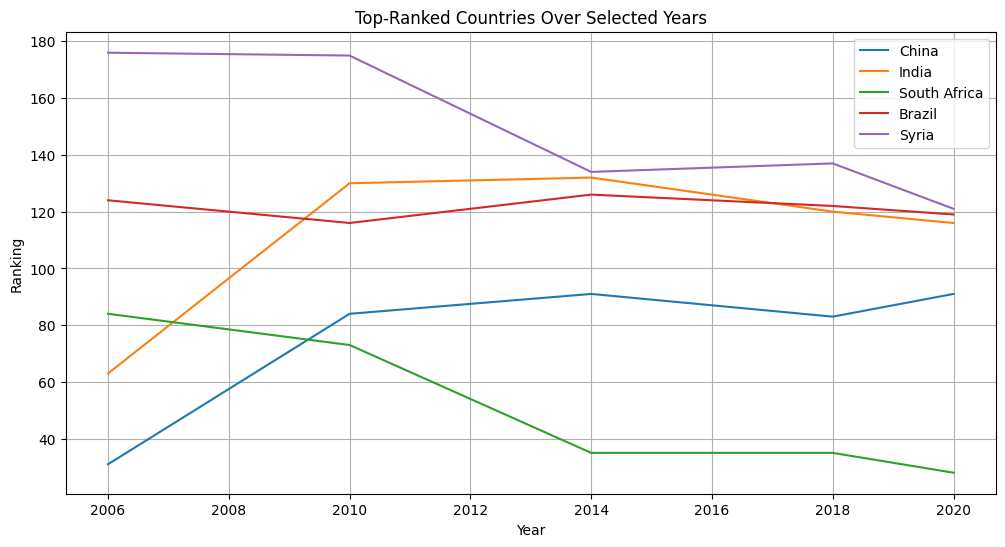

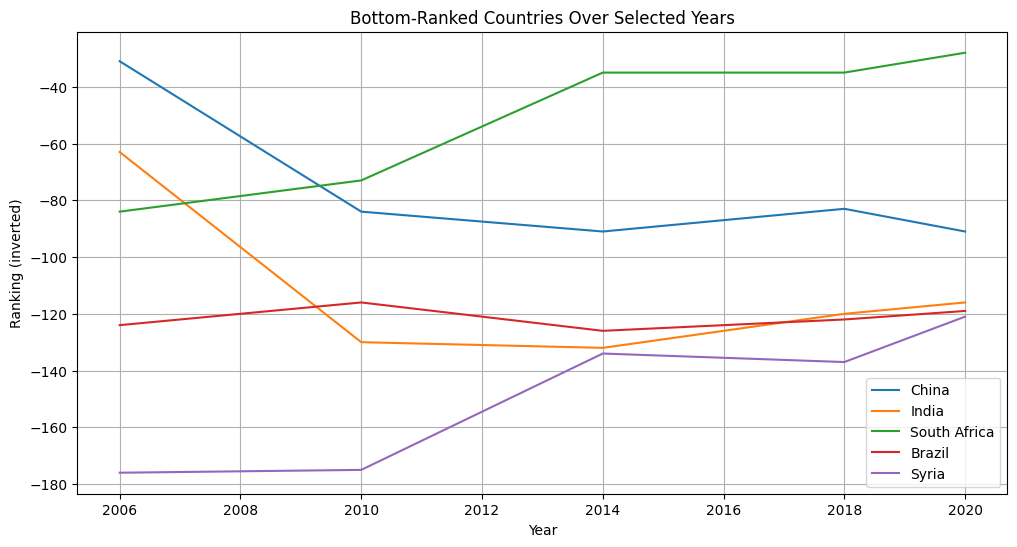

In [11]:
#ranking comparision
import matplotlib.pyplot as plt

# Replace these with your actual ranking data for each year
years = [2006, 2010, 2014, 2018, 2020]  # Years of interest
countries = ["China", "India", "South Africa", "Brazil", "Syria"]  # Country names
rankings = [
    [31, 63, 84, 124, 176],  # Rankings for 2006
    [84, 130, 73, 116, 175],  # Rankings for 2010
    [91, 132, 35, 126, 134],  # Rankings for 2014
    [83, 120, 35, 122, 137],  # Rankings for 2018
    [91, 116, 28, 119, 121],  # Rankings for 2020
]

# Visualize top-ranked countries over selected years
plt.figure(figsize=(12, 6))
for i, country in enumerate(countries):
    plt.plot(years, [rankings[j][i] for j in range(len(years))], label=country)

plt.title("Top-Ranked Countries Over Selected Years")
plt.xlabel("Year")
plt.ylabel("Ranking")
plt.legend()
plt.grid(True)
plt.show()

# Visualize bottom-ranked countries over selected years
plt.figure(figsize=(12, 6))
for i, country in enumerate(countries):
    plt.plot(years, [-rankings[j][i] for j in range(len(years))], label=country)

plt.title("Bottom-Ranked Countries Over Selected Years")
plt.xlabel("Year")
plt.ylabel("Ranking (inverted)")
plt.legend()
plt.grid(True)
plt.show()


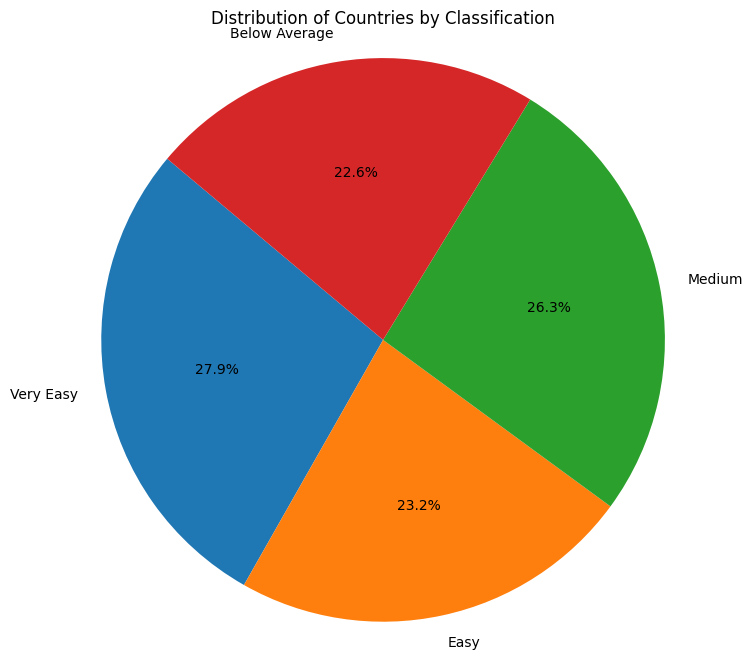

In [12]:
import matplotlib.pyplot as plt

# Data for classification distribution
classification_labels = ['Very Easy', 'Easy', 'Medium', 'Below Average']
classification_counts = [53, 44, 50, 43]  # Replace with your actual counts

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(classification_counts, labels=classification_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Countries by Classification')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


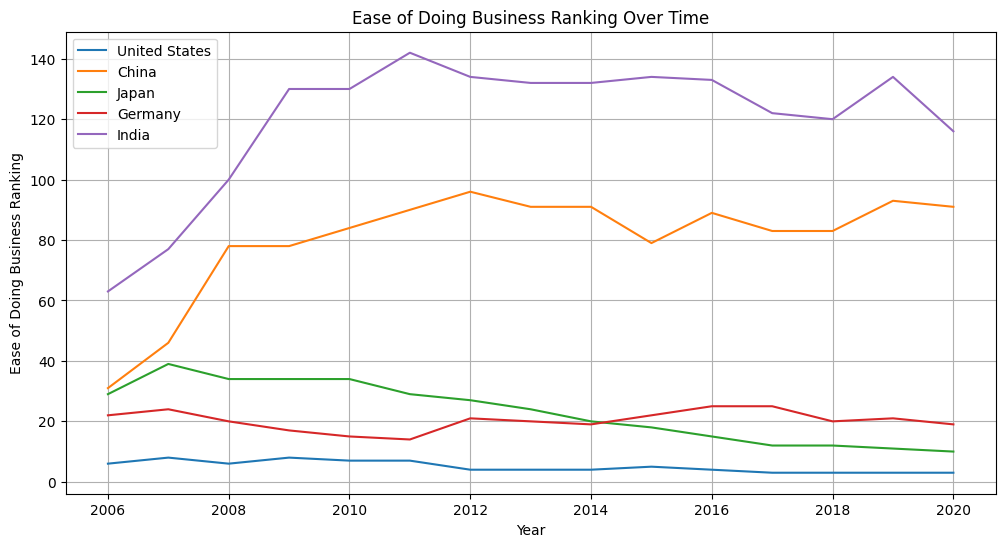

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the provided data
data = {
    'Year': list(range(2006, 2021)),
    'United States': [6, 8, 6, 8, 7, 7, 4, 4, 4, 5, 4, 3, 3, 3, 3],
    'China': [31, 46, 78, 78, 84, 90, 96, 91, 91, 79, 89, 83, 83, 93, 91],
    'Japan': [29, 39, 34, 34, 34, 29, 27, 24, 20, 18, 15, 12, 12, 11, 10],
    'Germany': [22, 24, 20, 17, 15, 14, 21, 20, 19, 22, 25, 25, 20, 21, 19],
    'India': [63, 77, 100, 130, 130, 142, 134, 132, 132, 134, 133, 122, 120, 134, 116]
}

df = pd.DataFrame(data)

# Set the 'Year' column as the index
df.set_index('Year', inplace=True)

# Plotting the time series data for each country
plt.figure(figsize=(12, 6))
for country in df.columns:
    plt.plot(df.index, df[country], label=country)

plt.xlabel('Year')
plt.ylabel('Ease of Doing Business Ranking')
plt.title('Ease of Doing Business Ranking Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
import numpy as np
from scipy import stats

# Data provided for the specified countries
data = [
    ["United States", "Very Easy", 6, 8, 6, 8, 7, 7, 4, 4, 4, 5, 4, 3, 3, 3, 3],
    ["China", "Very Easy", 31, 46, 78, 78, 84, 90, 96, 91, 91, 79, 89, 83, 83, 93, 91],
    ["Japan", "Very Easy", 29, 39, 34, 34, 34, 29, 27, 24, 20, 18, 15, 12, 12, 11, 10],
    ["Germany", "Very Easy", 22, 24, 20, 17, 15, 14, 21, 20, 19, 22, 25, 25, 20, 21, 19],
    ["India", "Easy", 63, 77, 100, 130, 130, 142, 134, 132, 132, 134, 133, 122, 120, 134, 116],
]

# Extract rankings for the years 2006 to 2020
years = list(range(2006, 2021))
rankings_dict = {}

for country, classification, *rankings in data:
    if country in ["United States", "China", "Japan", "Germany", "India"]:
        rankings_dict[country] = rankings

# Calculate mean, median, mode, standard deviation, and variance for each country
for country, rankings in rankings_dict.items():
    mean = np.mean(rankings)
    median = np.median(rankings)
    mode = stats.mode(rankings).mode[0]  # Compute the mode
    std_deviation = np.std(rankings, ddof=0)  # Use ddof=0 for population standard deviation
    variance = np.var(rankings, ddof=0)  # Use ddof=0 for population variance

    print(f"{country}:")
    print(f"  Mean = {mean:.2f}")
    print(f"  Median = {median}")
    print(f"  Mode = {mode}")
    print(f"  Standard Deviation = {std_deviation:.2f}")
    print(f"  Variance = {variance:.2f}")
    print()


United States:
  Mean = 5.00
  Median = 4.0
  Mode = 3
  Standard Deviation = 1.79
  Variance = 3.20

China:
  Mean = 80.20
  Median = 84.0
  Mode = 91
  Standard Deviation = 17.45
  Variance = 304.56

Japan:
  Mean = 23.20
  Median = 24.0
  Mode = 34
  Standard Deviation = 9.52
  Variance = 90.69

Germany:
  Mean = 20.27
  Median = 20.0
  Mode = 20
  Standard Deviation = 3.13
  Variance = 9.80

India:
  Mean = 119.93
  Median = 130.0
  Mode = 134
  Standard Deviation = 21.98
  Variance = 483.13



<ipython-input-22-fec9767cd07e>:25: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(rankings).mode[0]  # Compute the mode


In [21]:
#calculate for 2006-2020
import numpy as np

# Data provided for the specified countries
data = [
    ["United States", "Very Easy", 6, 8, 6, 8, 7, 7, 4, 4, 4, 5, 4, 3, 3, 3, 3],
    ["China", "Very Easy", 31, 46, 78, 78, 84, 90, 96, 91, 91, 79, 89, 83, 83, 93, 91],
    ["Japan", "Very Easy", 29, 39, 34, 34, 34, 29, 27, 24, 20, 18, 15, 12, 12, 11, 10],
    ["Germany", "Very Easy", 22, 24, 20, 17, 15, 14, 21, 20, 19, 22, 25, 25, 20, 21, 19],
    ["India", "Easy", 63, 77, 100, 130, 130, 142, 134, 132, 132, 134, 133, 122, 120, 134, 116],
]

# Extract rankings for the years 2006 to 2020
years = list(range(2006, 2021))
rankings_dict = {}

for country, classification, *rankings in data:
    if country in ["United States", "China", "Japan", "Germany", "India"]:
        rankings_dict[country] = rankings

# Calculate mean, median, standard deviation, and variance for each country
for country, rankings in rankings_dict.items():
    mean = np.mean(rankings)
    median = np.median(rankings)
    std_deviation = np.std(rankings, ddof=0)  # Use ddof=0 for population standard deviation
    variance = np.var(rankings, ddof=0)  # Use ddof=0 for population variance

    print(f"{country}:")
    print(f"  Mean = {mean:.2f}")
    print(f"  Median = {median}")
    print(f"  Standard Deviation = {std_deviation:.2f}")
    print(f"  Variance = {variance:.2f}")
    print()


United States:
  Mean = 5.00
  Median = 4.0
  Standard Deviation = 1.79
  Variance = 3.20

China:
  Mean = 80.20
  Median = 84.0
  Standard Deviation = 17.45
  Variance = 304.56

Japan:
  Mean = 23.20
  Median = 24.0
  Standard Deviation = 9.52
  Variance = 90.69

Germany:
  Mean = 20.27
  Median = 20.0
  Standard Deviation = 3.13
  Variance = 9.80

India:
  Mean = 119.93
  Median = 130.0
  Standard Deviation = 21.98
  Variance = 483.13



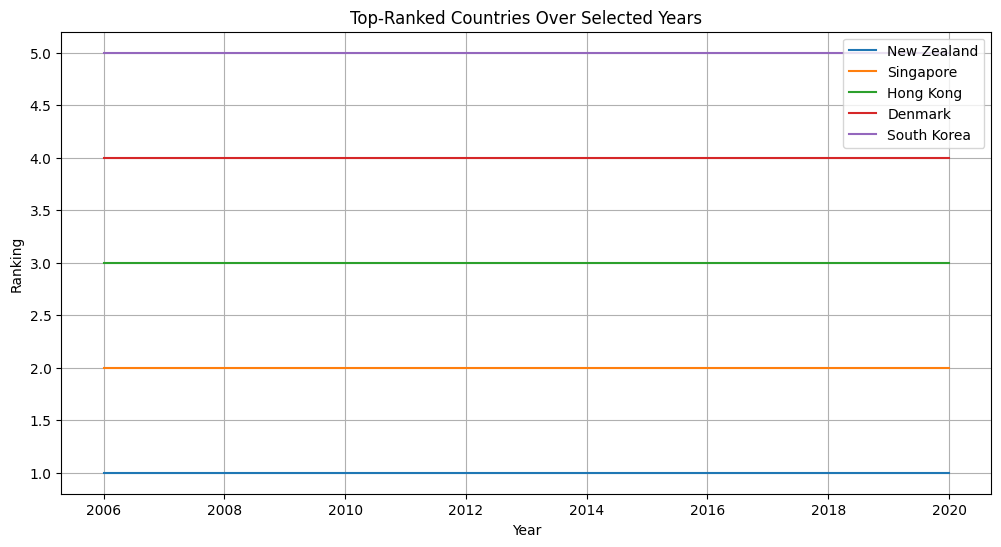

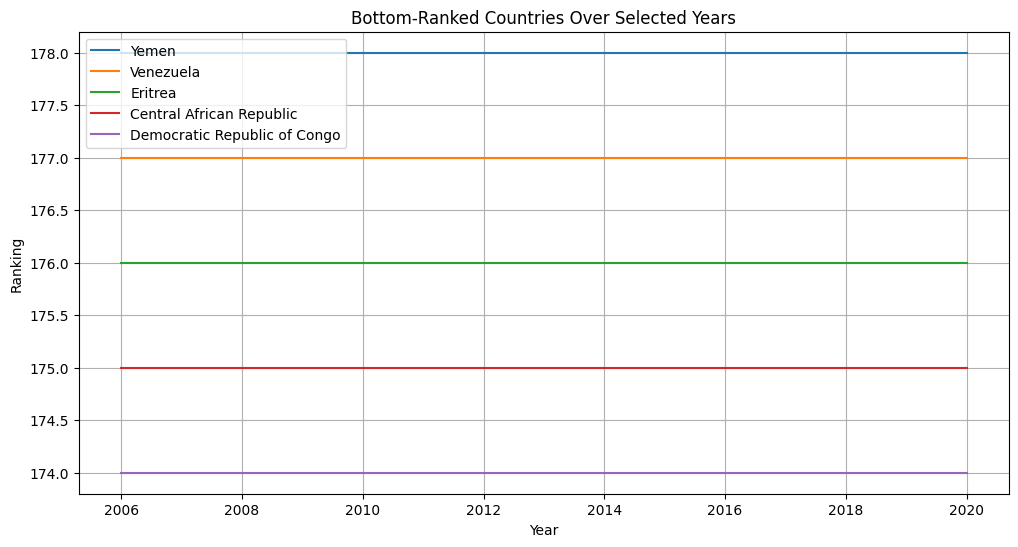

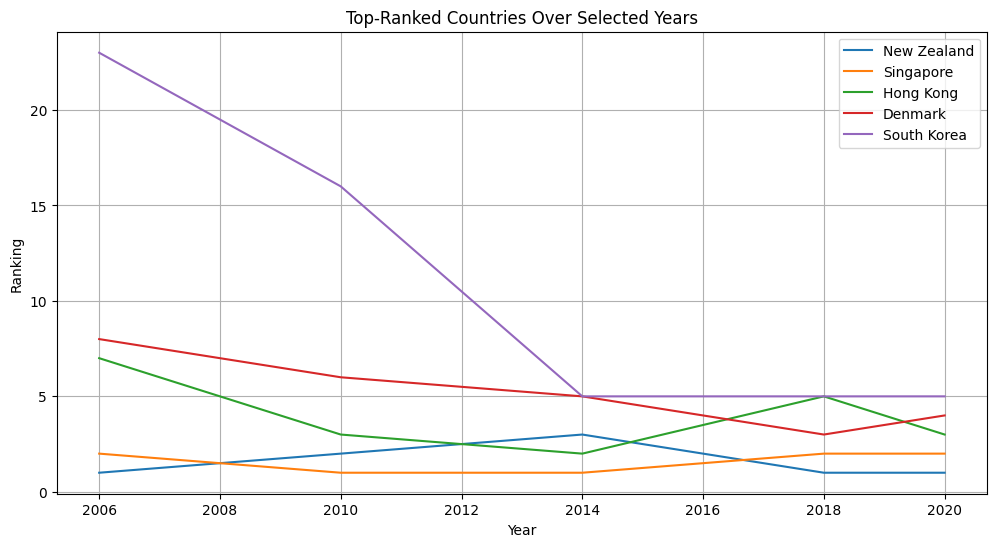

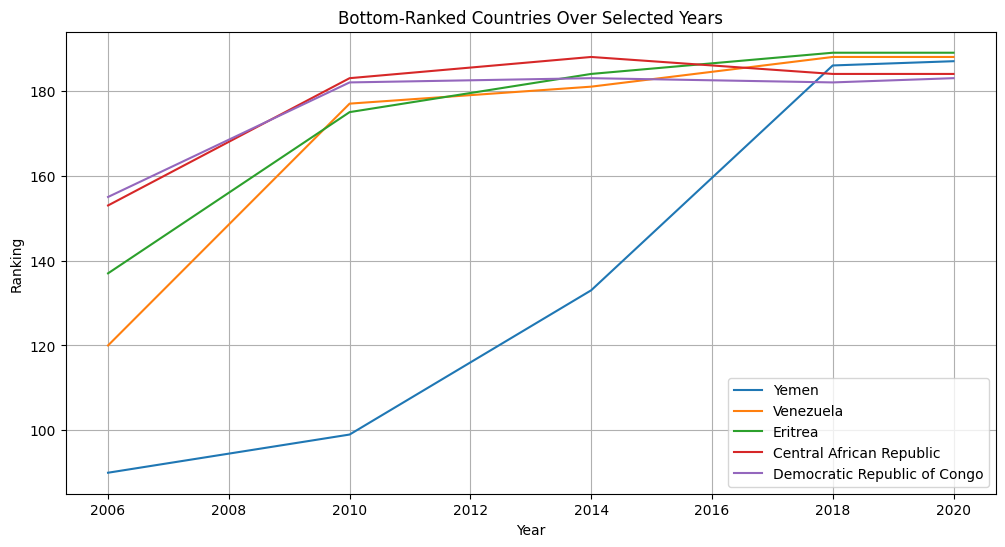

In [1]:
import matplotlib.pyplot as plt

# Replace these with your actual ranking data for each year
years = [2006, 2010, 2014, 2018, 2020]  # Years of interest
top_countries = ["New Zealand", "Singapore", "Hong Kong", "Denmark", "South Korea"]  # Top-ranked countries
bottom_countries = ["Yemen", "Venezuela", "Eritrea", "Central African Republic", "Democratic Republic of Congo"]  # Bottom-ranked countries
top_rankings = [
    [1, 2, 3, 4, 5],  # Rankings for 2006
    [1, 2, 3, 4, 5],  # Rankings for 2010
    [1, 2, 3, 4, 5],  # Rankings for 2014
    [1, 2, 3, 4, 5],  # Rankings for 2018
    [1, 2, 3, 4, 5],  # Rankings for 2020
]
bottom_rankings = [
    [178, 177, 176, 175, 174],  # Rankings for 2006
    [178, 177, 176, 175, 174],  # Rankings for 2010
    [178, 177, 176, 175, 174],  # Rankings for 2014
    [178, 177, 176, 175, 174],  # Rankings for 2018
    [178, 177, 176, 175, 174],  # Rankings for 2020
]

# Visualize top-ranked countries over selected years
plt.figure(figsize=(12, 6))
for i, country in enumerate(top_countries):
    plt.plot(years, [top_rankings[j][i] for j in range(len(years))], label=country)

plt.title("Top-Ranked Countries Over Selected Years")
plt.xlabel("Year")
plt.ylabel("Ranking")
plt.legend()
plt.grid(True)
plt.show()

# Visualize bottom-ranked countries over selected years
plt.figure(figsize=(12, 6))
for i, country in enumerate(bottom_countries):
    plt.plot(years, [bottom_rankings[j][i] for j in range(len(years))], label=country)

plt.title("Bottom-Ranked Countries Over Selected Years")
plt.xlabel("Year")
plt.ylabel("Ranking")
plt.legend()
plt.grid(True)
plt.show()
import matplotlib.pyplot as plt

# Replace these with your actual ranking data for each year
years = [2006, 2010, 2014, 2018, 2020]  # Years of interest
top_countries = ["New Zealand", "Singapore", "Hong Kong", "Denmark", "South Korea"]  # Top-ranked countries
bottom_countries = ["Yemen", "Venezuela", "Eritrea", "Central African Republic", "Democratic Republic of Congo"]  # Bottom-ranked countries
top_rankings = [
    [1, 2, 7, 8, 23],  # Rankings for 2006
    [2, 1, 3, 6, 16],  # Rankings for 2010
    [3, 1, 2, 5, 5],  # Rankings for 2014
    [1, 2, 5, 3, 5],  # Rankings for 2018
    [1, 2, 3, 4, 5],  # Rankings for 2020
]
bottom_rankings = [
    [90, 120, 137, 153, 155],  # Rankings for 2006
    [99, 177, 175, 183, 182],  # Rankings for 2010
    [133, 181, 184, 188, 183],  # Rankings for 2014
    [186, 188, 189, 184, 182],  # Rankings for 2018
    [187, 188, 189, 184, 183],  # Rankings for 2020
]

# Visualize top-ranked countries over selected years
plt.figure(figsize=(12, 6))
for i, country in enumerate(top_countries):
    plt.plot(years, [top_rankings[j][i] for j in range(len(years))], label=country)

plt.title("Top-Ranked Countries Over Selected Years")
plt.xlabel("Year")
plt.ylabel("Ranking")
plt.legend()
plt.grid(True)
plt.show()

# Visualize bottom-ranked countries over selected years
plt.figure(figsize=(12, 6))
for i, country in enumerate(bottom_countries):
    plt.plot(years, [bottom_rankings[j][i] for j in range(len(years))], label=country)

plt.title("Bottom-Ranked Countries Over Selected Years")
plt.xlabel("Year")
plt.ylabel("Ranking")
plt.legend()
plt.grid(True)
plt.show()


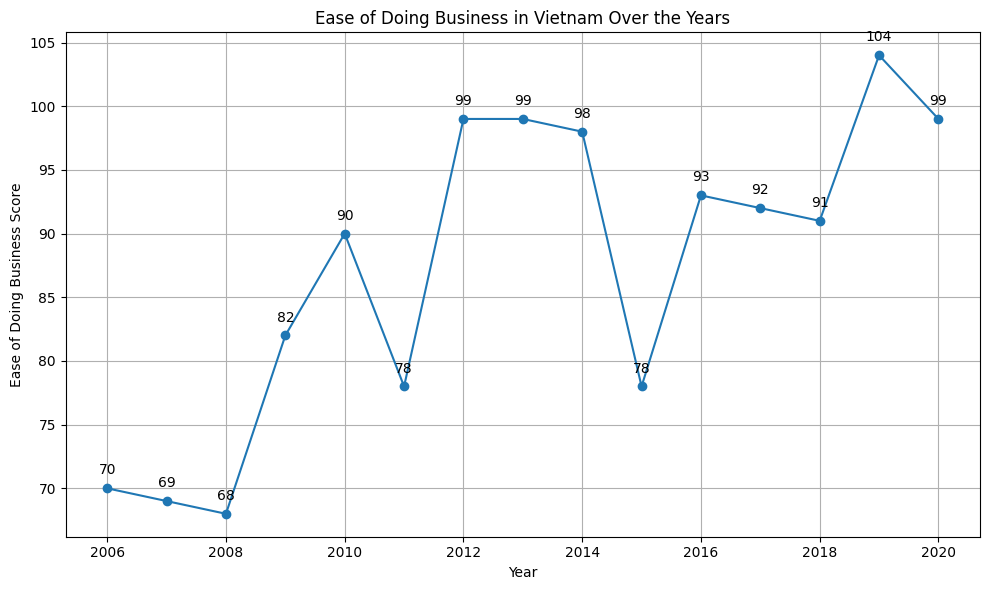

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'Year': ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
    'Vietnam': [70, 69, 68, 82, 90, 78, 99, 99, 98, 78, 93, 92, 91, 104, 99]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Convert the 'Year' column to numeric
df['Year'] = pd.to_numeric(df['Year'])

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Vietnam'], marker='o', linestyle='-')
plt.title('Ease of Doing Business in Vietnam Over the Years')
plt.xlabel('Year')
plt.ylabel('Ease of Doing Business Score')
plt.grid(True)

# Adding labels to data points for clarity
for i, score in enumerate(df['Vietnam']):
    plt.annotate(score, (df['Year'].iloc[i], score), textcoords="offset points", xytext=(0, 10), ha='center')

# Show the line chart
plt.tight_layout()
plt.show()
